<a href="https://colab.research.google.com/github/Sanket758/Machine-Learning-Projects/blob/master/Introduction_To_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

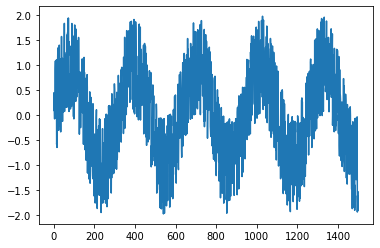

In [8]:
t = np.arange(0, 1500)
actual_x = np.sin(0.02*t)
plt.plot(x)

In [9]:
# Adding noise
x_with_noise = x+ np.random.uniform(low=-1, high=1, size=(1500,))

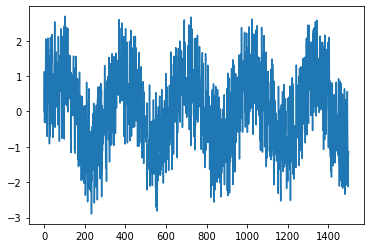

In [11]:
plt.plot(x_with_noise)

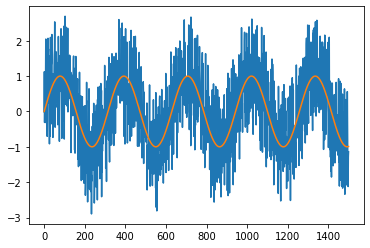

In [17]:
# Plotting both of the data together
plt.plot(x_with_noise)
plt.plot(actual_x);

In [20]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0,1))
x = (np.reshape(x_with_noise, (-1,1)))
x = normalizer.fit_transform(x)
print(x)

[[0.51676004]
 [0.71941794]
 [0.46273982]
 ...
 [0.13850349]
 [0.28912443]
 [0.3143337 ]]


In [22]:
# Creating a dataset
training = x[:1200]
testing = x[1200:]
print(training.shape, testing.shape)

(1200, 1) (300, 1)


In [23]:
def createDataset(data, step):
    X, y = [], []
    for i in range(len(data)-step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

In [24]:
step = 10
X_train, y_train = createDataset(training, step)
X_test, y_test = createDataset(testing, step)
print(X_train.shape, y_train.shape)
print()
print(X_test.shape, y_test.shape)

(1190, 10, 1) (1190, 1)

(290, 10, 1) (290, 1)


In [25]:
X_train[0]

array([[0.51676004],
       [0.71941794],
       [0.46273982],
       [0.54294433],
       [0.65898666],
       [0.64818247],
       [0.62403718],
       [0.70166196],
       [0.8845315 ],
       [0.54037182]])

In [26]:
y_train[0]

array([0.49564324])

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

model = Sequential()
model.add(SimpleRNN(units=1, activation='tanh'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='rmsprop')

history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
75/75 - 0s - loss: 0.0344
Epoch 2/200
75/75 - 0s - loss: 0.0298
Epoch 3/200
75/75 - 0s - loss: 0.0291
Epoch 4/200
75/75 - 0s - loss: 0.0286
Epoch 5/200
75/75 - 0s - loss: 0.0282
Epoch 6/200
75/75 - 0s - loss: 0.0280
Epoch 7/200
75/75 - 0s - loss: 0.0279
Epoch 8/200
75/75 - 0s - loss: 0.0279
Epoch 9/200
75/75 - 0s - loss: 0.0278
Epoch 10/200
75/75 - 0s - loss: 0.0278
Epoch 11/200
75/75 - 0s - loss: 0.0278
Epoch 12/200
75/75 - 0s - loss: 0.0276
Epoch 13/200
75/75 - 0s - loss: 0.0277
Epoch 14/200
75/75 - 0s - loss: 0.0277
Epoch 15/200
75/75 - 0s - loss: 0.0276
Epoch 16/200
75/75 - 0s - loss: 0.0276
Epoch 17/200
75/75 - 0s - loss: 0.0276
Epoch 18/200
75/75 - 0s - loss: 0.0275
Epoch 19/200
75/75 - 0s - loss: 0.0275
Epoch 20/200
75/75 - 0s - loss: 0.0275
Epoch 21/200
75/75 - 0s - loss: 0.0274
Epoch 22/200
75/75 - 0s - loss: 0.0274
Epoch 23/200
75/75 - 0s - loss: 0.0274
Epoch 24/200
75/75 - 0s - loss: 0.0274
Epoch 25/200
75/75 - 0s - loss: 0.0273
Epoch 26/200
75/75 - 0s - loss: 0.

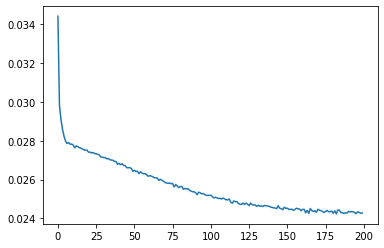

In [28]:
loss = history.history['loss']
plt.plot(loss)

In [30]:
trainPredict = normalizer.inverse_transform(model.predict(X_train))
testPredict = normalizer.inverse_transform(model.predict(X_test))
predicted = np.concatenate((trainPredict, testPredict))

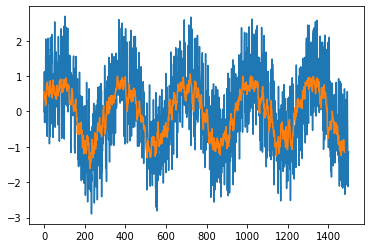

In [31]:
x = normalizer.inverse_transform(x)
plt.plot(x)
plt.plot(predicted)

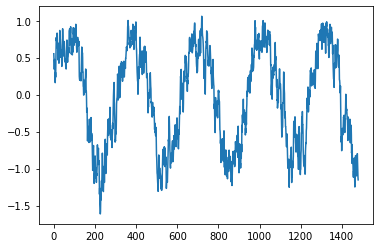

In [33]:
plt.plot(predicted);

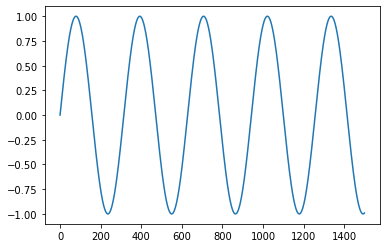

In [34]:
plt.plot(actual_x)